In [1]:
!mkdir ~/.kaggle
!kaggle datasets download -d fedesoriano/heart-failure-prediction

The syntax of the command is incorrect.


'kaggle' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import pandas as pd

heart = pd.read_csv("heart-failure-prediction\heart.csv")
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


<Axes: xlabel='MaxHR', ylabel='HeartDisease'>

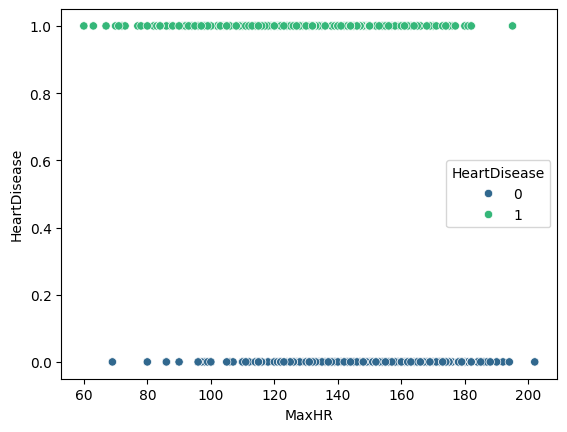

In [3]:
import seaborn as sns

sns.scatterplot(heart,x = "MaxHR", y = "HeartDisease", hue="HeartDisease", palette="viridis")

In [4]:
from sklearn.linear_model import LogisticRegression

x_train = heart['MaxHR'].to_numpy().reshape((len(heart['MaxHR']),1))
y_train = heart['HeartDisease'].to_numpy()

x_train.shape, y_train.shape

((918, 1), (918,))

In [5]:
lr = LogisticRegression().fit(x_train,y_train)
lr.predict(x_train).shape


(918,)

In [6]:
lr.predict_proba(x_train)
# For each row, the first column is the probability of class 0, and the second column is for class 1.

array([[0.73906104, 0.26093896],
       [0.61026345, 0.38973655],
       [0.15446209, 0.84553791],
       ...,
       [0.25534453, 0.74465547],
       [0.75309324, 0.24690676],
       [0.7461411 , 0.2538589 ]])

In [7]:
from copy import deepcopy

predicions_df = deepcopy(heart[['MaxHR','HeartDisease']])
predicions_df['Probability'] = lr.predict_proba(x_train)[: , 1]
predicions_df['Prediction'] = (lr.predict_proba(x_train)[: , 1] > 0.5).astype(int)
predicions_df.head()


,MaxHR,HeartDisease,Probability,Prediction
0,172,0,0.260939,0
1,156,1,0.389737,0
2,98,0,0.845538,1
3,108,1,0.790775,1
4,122,0,0.692325,1


In [8]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=predicions_df['MaxHR'], 
        y=predicions_df['HeartDisease'], 
        mode='markers', 
        name='Observed', 
        marker={'color': 'blue'}
    )
)

fig.add_trace(
    go.Scatter(
        x=predicions_df['MaxHR'], 
        y=predicions_df['Probability'], 
        mode='markers', 
        name='Model Predictions', 
        marker={'color': 'green'}
    )
)

fig.update_layout(
    title="Heart Disease vs Max Heart Rate",
    xaxis_title="Max Heart Rate",
    yaxis_title="Heart Disease"
)

fig.show()

In [9]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=predicions_df['MaxHR'], y=predicions_df['Prediction'],
                         mode='markers', name='Model Predictions', marker={'color':'blue'}))

fig.add_trace(go.Scatter(x=predicions_df['MaxHR'], y=predicions_df['Probability'],
                         mode='markers', name='Model Probabilities', marker={'color':'green'}))

fig.update_layout(
    title="Heart Disease vs Max Heart Rate",
    xaxis_title="Max Heart Rate",
    yaxis_title="Heart Disease"
)

fig.show()

In [13]:
from sklearn.metrics import accuracy_score

accuracy_score(predicions_df['Prediction'],y_train)

0.6710239651416122

In [14]:
lr.intercept_, lr.coef_

(array([5.33015391]), array([[-0.03704214]]))

In [15]:
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [17]:
import numpy as np

def sigmoid(x):
    return 1/(1 + np.exp(-x))

sigmoid(0)

np.float64(0.5)

In [22]:
test_range = np.arange(-50,50)

fig = go.Figure()

fig.add_trace(go.Scatter(x = test_range, y = sigmoid(test_range)))

In [23]:
# Assuming Pr(HeartDisease[i]) = Sigmoid(alpha + (beta * MaxHR[i])) + error
# Generally: Pr(y[i]) = Sigmoid(alpha + (beta * x[i])) + error
# Generally: Pr(y[i]) = Sigmoid(alpha_hat + (beta_hat * x[i]))

def get_probabilities(model, x):
  '''
  Obtain the predictions for the given model and inputs.

  model: {'alpha_hat':Number, 'beta_hat':Number}
  x: np.array of Floats with shape (n,) of inputs

  Returns: np.array of 0 <= Floats <= 1 with shape (n,),
           representing probabilities
  '''
  alpha_hat = model['alpha_hat']
  beta_hat = model['beta_hat']

  return sigmoid(alpha_hat + beta_hat*x)

In [24]:
x_train.flatten().shape

(918,)

In [27]:
test_model = dict(alpha_hat=0, beta_hat=0)
predicions_df['Our Model Heart Disease Probabilities'] = get_probabilities(test_model, x_train.flatten())
predicions_df.head()

,MaxHR,HeartDisease,Probability,Prediction,Our Model Heart Disease Probabilities
0,172,0,0.260939,0,0.5
1,156,1,0.389737,0,0.5
2,98,0,0.845538,1,0.5
3,108,1,0.790775,1,0.5
4,122,0,0.692325,1,0.5


In [29]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=predicions_df['MaxHR'], y=predicions_df['HeartDisease'],
                         mode='markers', name='Observed', marker=dict(color='orange')))

fig.add_trace(go.Scatter(x=predicions_df['MaxHR'], y=predicions_df['Probability'],
                         mode='markers', name='SK Learn Probabilities', marker=dict(color='blue')))

fig.add_trace(go.Scatter(x=predicions_df['MaxHR'], y=predicions_df['Our Model Heart Disease Probabilities'],
                         mode='markers', name='Our Model Heart Disease Probabilities', marker=dict(color='red')))

fig.add_trace(go.Scatter(x=predicions_df['MaxHR'], y=[.5]*len(predicions_df),
                         name='Threshold', marker={'color':'purple'}))

fig.update_layout(
    title="Heart Disease vs Max Heart Rate",
    xaxis_title="Max Heart Rate",
    yaxis_title="Heart Disease"
)

fig.show()

In [31]:
accuracy_score(predicions_df['Our Model Heart Disease Probabilities']>.5, y_train)

0.4466230936819172

In [32]:
from sklearn.metrics import mean_squared_error

def function_to_minimize(params, *args):
  alpha_hat = params[0]
  beta_hat = params[1]
  model = {'alpha_hat':alpha_hat, 'beta_hat':beta_hat}
  x = args[0]
  y = args[1]
  prediction_probs = get_probabilities(model, x)

  return mean_squared_error(prediction_probs, y)

In [33]:
from scipy.optimize import minimize

def get_best_model(x, y):
  '''
  Returns the model with the parameters that minimize the MSE.

  x: np.array of Floats with shape (n,) of inputs
  y: np.array of Int in {0, 1} with shape (n,) of outputs

  Returns: {'alpha_hat':Float, 'beta_hat':Float} representing the model.
  '''

  res = minimize(function_to_minimize, x0=[0, 0], args=(x, y))
  parameters = res.x
  alpha_hat, beta_hat = parameters[0], parameters[1]
  best_model = dict(alpha_hat=alpha_hat, beta_hat=beta_hat)

  return best_model

In [35]:
best_model = get_best_model(x_train.flatten(), predicions_df['HeartDisease'])
best_model

{'alpha_hat': np.float64(5.516771502031838),
 'beta_hat': np.float64(-0.03825338787863001)}

In [37]:
predicions_df['Our Model Heart Disease Probabilities'] = get_probabilities(best_model, x_train.flatten())
predicions_df.head()

,MaxHR,HeartDisease,Probability,Prediction,Our Model Heart Disease Probabilities
0,172,0,0.260939,0,0.256773
1,156,1,0.389737,0,0.389181
2,98,0,0.845538,1,0.854201
3,108,1,0.790775,1,0.799858
4,122,0,0.692325,1,0.700537


In [38]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=predicions_df['MaxHR'], y=predicions_df['HeartDisease'],
                         mode='markers', name='Observed', marker=dict(color='orange')))

fig.add_trace(go.Scatter(x=predicions_df['MaxHR'], y=predicions_df['Probability'],
                         mode='markers', name='SK Learn Probabilities', marker=dict(color='blue')))

fig.add_trace(go.Scatter(x=predicions_df['MaxHR'], y=predicions_df['Our Model Heart Disease Probabilities'],
                         mode='markers', name='Our Model Heart Disease Probabilities', marker=dict(color='red')))

fig.add_trace(go.Scatter(x=predicions_df['MaxHR'], y=[.5]*len(predicions_df),
                         name='Threshold', marker={'color':'purple'}))

fig.update_layout(
    title="Heart Disease vs Max Heart Rate",
    xaxis_title="Max Heart Rate",
    yaxis_title="Heart Disease"
)

fig.show()

In [39]:
accuracy_score(predicions_df['Our Model Heart Disease Probabilities']>.5, y_train)

0.6721132897603486

In [40]:
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [41]:
train = heart[['Age','RestingBP',	'Cholesterol','MaxHR', 'HeartDisease']].to_numpy()
X_train, y_train = train[:, :-1], train[:, -1]
X_train.shape, y_train.shape

((918, 4), (918,))

In [42]:
lr = LogisticRegression().fit(X_train, y_train)

accuracy_score(lr.predict(X_train), y_train)

0.7015250544662309